## Neural Network Classification w PyTorch
 ## 1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples

n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [5]:
 # Make DataFrame

import pandas as pd

circles = pd.DataFrame({ "X1" : X[:, 0], 
                        "X2" : X[:, 1], "label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


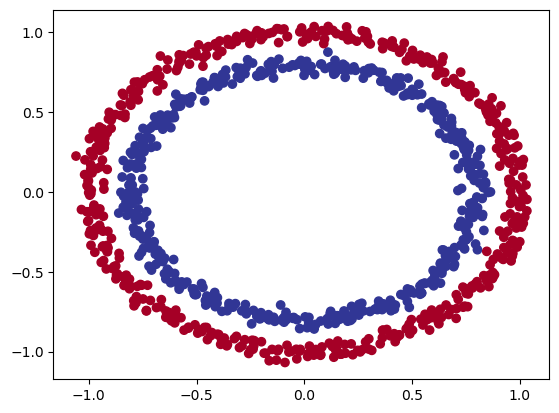

In [6]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for 1 sample of X {X_sample}, and the same for y: {y_sample}")
print(f"Sjapes for one sample of X: {X_sample.shape}, and the same for y: {y_sample.shape}")

Values for 1 sample of X [0.75424625 0.23148074], and the same for y: 1
Sjapes for one sample of X: (2,), and the same for y: ()


### Turn data into tensors and create train and test

In [9]:
import torch

In [10]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float) # Torch uses float32 , numpy float64
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [12]:
len(X_train), len(X_test)

(800, 200)

## Building a model

In [13]:
# Import
import torch
from torch import nn

# Make device agnostic

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [15]:
# Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    
    # Create a forward method

    def forward(self, x):
        return self.layer2(self.layer1(1))

# Instantiate an instace of model class

model_0 = CircleModelV0().to(device)
model_0
    


CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
device

'cuda'

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3855,  0.4066],
                      [-0.4016,  0.6605],
                      [-0.6758, -0.6269],
                      [ 0.0678, -0.6705],
                      [-0.0894, -0.5218]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2624,  0.1321,  0.1435, -0.4103, -0.2327], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0500,  0.2409, -0.4289,  0.1777,  0.1893]], device='cuda:0')),
             ('1.bias', tensor([0.2517], device='cuda:0'))])

In [20]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

    print(f"Len of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")

    print(f"Len of test: {len(X_test)}, Shape: {X_test.shape}")

    print(f"\n First 10 predictions: \n{torch.round(untrained_preds[:10])}")
    print(f"\nFirst 10 labels:\n{y_test[:10]}")

Len of predictions: 200, Shape: torch.Size([200, 1])
Len of test: 200, Shape: torch.Size([200, 2])

 First 10 predictions: 
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Set up loss fucntion and optimizer

Which loss function or optimizer should we use?

For example for regression we might want MAE or MSE
For classification we might want use binary cross entropy

In [22]:
# Setup the loss function

loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in (BCELoss with sigmoid)
optimize = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [28]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Train model

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into prediction probabilities by passing them to some kind of activation function.

In [24]:
# View the first 5 outputs of the forward pass
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1842],
        [ 0.3028],
        [-0.0604],
        [ 0.2532],
        [ 0.0450]], device='cuda:0')

In [25]:
# Use the sigmoid activation function on our model logits to turn them into prediction prob
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5459],
        [0.5751],
        [0.4849],
        [0.5630],
        [0.5112]], device='cuda:0')

In [26]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0')

### Building a training and testing loop

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs

epochs = 100

# Put data to the device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Caluclate the loss
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input

    acc = accuracy_fn(y_true= y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimize.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (Update optimizer)
    optimize.step()

    ### Testing

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred=test_pred)

    
    if epoch % 10 == 0:
        print(f" Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")




 Epoch: 0 | Loss: 0.69661, Acc: 52.88% | Test loss: 0.70418, Test Acc: 48.00
 Epoch: 10 | Loss: 0.69512, Acc: 52.50% | Test loss: 0.70146, Test Acc: 46.50
 Epoch: 20 | Loss: 0.69433, Acc: 52.00% | Test loss: 0.69973, Test Acc: 48.00
 Epoch: 30 | Loss: 0.69389, Acc: 51.88% | Test loss: 0.69857, Test Acc: 47.00
 Epoch: 40 | Loss: 0.69363, Acc: 51.50% | Test loss: 0.69774, Test Acc: 47.00
 Epoch: 50 | Loss: 0.69346, Acc: 51.38% | Test loss: 0.69713, Test Acc: 47.00
 Epoch: 60 | Loss: 0.69334, Acc: 51.00% | Test loss: 0.69666, Test Acc: 47.00
 Epoch: 70 | Loss: 0.69326, Acc: 50.88% | Test loss: 0.69629, Test Acc: 47.00
 Epoch: 80 | Loss: 0.69320, Acc: 50.75% | Test loss: 0.69600, Test Acc: 47.00
 Epoch: 90 | Loss: 0.69316, Acc: 50.38% | Test loss: 0.69577, Test Acc: 46.50


## Improving a model

* Add more layers
* Add more hidden units
* Fit for longer
* Changing activation function
* Changing the lr


### Preparing data to see if our model can fit a straight line

## The missing piece: non-linearity

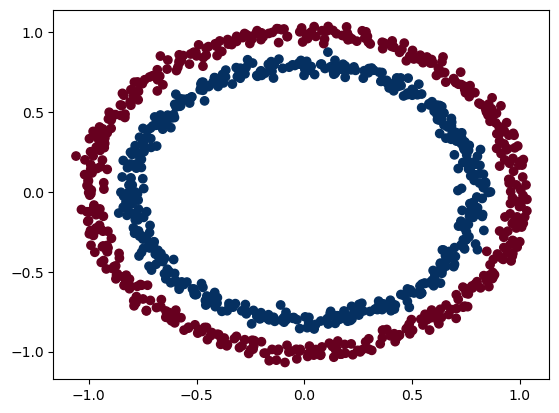

In [28]:
### Recreate non linear data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdBu)

In [29]:
# Convert data to tensors and train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split

X_train,X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
 

### Building a model with non-linearity

In [30]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer2 = nn.Linear(in_features = 10 , out_features = 10)
        self.layer3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU() # Non-linear activation function

    def forward(self, x):

        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [31]:
# Set up loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)


### Train model with non-linearity

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()

    # Forward pass

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Loss

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step
    optimizer.step()


    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print

    if epoch % 100 == 0:
        print(f" Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")




 Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test Acc: 50.00


 Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test Acc: 52.50
 Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test Acc: 55.00
 Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test Acc: 56.00
 Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test Acc: 56.50
 Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test Acc: 56.50
 Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test Acc: 56.00
 Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test Acc: 59.00
 Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test Acc: 67.50
 Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test Acc: 79.00


## Putting it all together with a multi-class classification problem

### Creating toy multi-class dataset

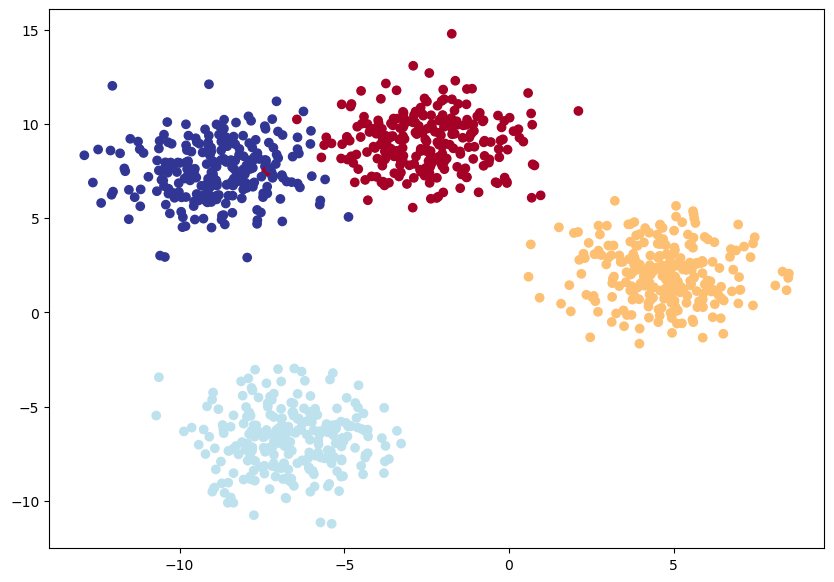

In [19]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data

X_blob, y_blob = make_blobs(n_samples=1000, n_features= NUM_FEATURES, centers=NUM_CLASSES, cluster_std = 1.5, random_state=RANDOM_SEED)


# Turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building a multi-class classification model

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
#Build model

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8) -> None:
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)

        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Loss Function and Optimizer

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr = 0.1)

### Getting prediction probabilities

In order to evaluate and traind and test model, we need to convert model outputs (logits)

In [23]:
### Getting predictions

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10], y_blob_test[:10]

(tensor([[ 0.1668, -0.1648, -0.2447, -0.2628],
         [-0.8303,  1.1338, -1.9211, -1.0774],
         [-0.1394,  0.4326, -0.2039, -0.0327],
         [ 0.1601, -0.0716, -0.2325, -0.1625],
         [-0.5792,  0.6718, -0.7180, -0.6191],
         [-1.0034,  1.2881, -2.2622, -1.3012],
         [-0.0739,  0.3410, -0.1995, -0.0446],
         [-0.5567,  0.8244, -1.0230, -0.6700],
         [-0.1303,  0.5322, -0.4467, -0.1652],
         [-0.5132,  0.7528, -0.8784, -0.6219]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [24]:
# Convert our model's logit outputs

y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.1668, -0.1648, -0.2447, -0.2628],
        [-0.8303,  1.1338, -1.9211, -1.0774],
        [-0.1394,  0.4326, -0.2039, -0.0327],
        [ 0.1601, -0.0716, -0.2325, -0.1625],
        [-0.5792,  0.6718, -0.7180, -0.6191]], device='cuda:0')
tensor([[0.3299, 0.2368, 0.2186, 0.2147],
        [0.1082, 0.7710, 0.0363, 0.0845],
        [0.2074, 0.3674, 0.1944, 0.2307],
        [0.3132, 0.2484, 0.2115, 0.2269],
        [0.1581, 0.5524, 0.1376, 0.1519]], device='cuda:0')


In [25]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 0], device='cuda:0')

In [26]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [31]:

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


for epoch in range(epochs):
    model_4.train()

    # Forward pass
    y_logits = model_4(X_blob_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    #Loss
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)
    # Zero grad
    optimizer.zero_grad()

    #Backward
    loss.backward()

    # Step
    optimizer.step()

    ### Testing

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)
    
    if epoch % 10 == 0:
        print(f" Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

 Epoch: 0 | Loss: 1.30442, Acc: 25.12% | Test loss: 1.21861, Test Acc: 35.00
 Epoch: 10 | Loss: 0.78807, Acc: 68.38% | Test loss: 0.77662, Test Acc: 71.50
 Epoch: 20 | Loss: 0.54014, Acc: 75.12% | Test loss: 0.55247, Test Acc: 75.00
 Epoch: 30 | Loss: 0.45046, Acc: 87.38% | Test loss: 0.40195, Test Acc: 94.50
 Epoch: 40 | Loss: 0.14353, Acc: 99.12% | Test loss: 0.13103, Test Acc: 99.50
 Epoch: 50 | Loss: 0.07698, Acc: 99.25% | Test loss: 0.06938, Test Acc: 99.50
 Epoch: 60 | Loss: 0.05691, Acc: 99.12% | Test loss: 0.04982, Test Acc: 99.50
 Epoch: 70 | Loss: 0.04739, Acc: 99.12% | Test loss: 0.04013, Test Acc: 99.50
 Epoch: 80 | Loss: 0.04187, Acc: 99.12% | Test loss: 0.03433, Test Acc: 99.50
 Epoch: 90 | Loss: 0.03829, Acc: 99.12% | Test loss: 0.03046, Test Acc: 99.50


IT WILL WORK WITHOUT RELU BECAUSE OUR DATA IS LINEARLY SEPERABLE

# EXERCISES

## 1. Get the Data Ready

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import make_moons

In [2]:
X_moons, y_moons = make_moons(n_samples=1000,
                              noise=0.07,
                              random_state=42)

In [3]:
X_moons[:5], y_moons[:5]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483]]),
 array([1, 1, 1, 1, 0]))

In [4]:
type(X_moons)

numpy.ndarray

### Convert to torch


In [5]:

X_moons = torch.from_numpy(X_moons).type(torch.float)
y_moons = torch.from_numpy(y_moons).type(torch.float)

X_moons[:5], y_moons[:5]

(tensor([[-0.0334,  0.4214],
         [ 0.9988, -0.4429],
         [ 0.8896, -0.3278],
         [ 0.3420, -0.4177],
         [-0.8385,  0.5324]]),
 tensor([1., 1., 1., 1., 0.]))

### Visualize

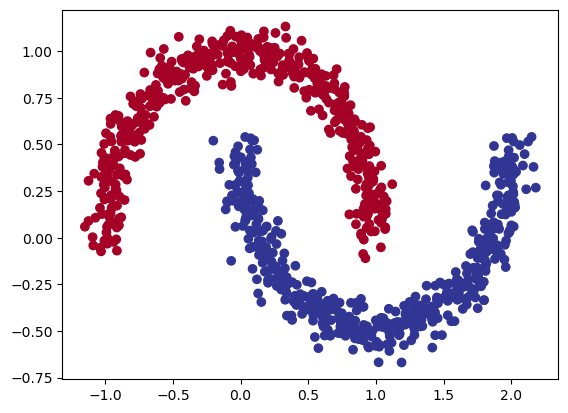

In [6]:
# Visualize the data
# Visualize
plt.scatter(x=X_moons[:, 0],
            y=X_moons[:, 1],
            c=y_moons,
            cmap=plt.cm.RdYlBu);

### Split the data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [8]:
len(X_train), len(y_train)

(800, 800)

### Device agnostic

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device),y_test.to(device)

## 2. Build the model

In [11]:
class MoonModelV0(nn.Module):
    def __init__(self,in_features, out_features, hidden_units):
        super().__init__()
        self.layer1 = nn.Linear(in_features=in_features, out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units, out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, X):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(X)))))
    

model_0 = MoonModelV0(in_features=2, out_features=1, hidden_units=10).to(device)
model_0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)

In [13]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device

In [14]:
# Training loop

epochs = 1000

for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # Calculate the loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_preds, y_train)

    # Zero grad
    optimizer.zero_grad()

    # Backward
    loss.backward()

    #Step
    optimizer.step()

    ### EVAL

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))


        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_preds, y_test)

        # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69 Acc: 0.50 | Test loss: 0.68 Test acc: 0.50
Epoch: 100 | Loss: 0.28 Acc: 0.87 | Test loss: 0.29 Test acc: 0.86
Epoch: 200 | Loss: 0.23 Acc: 0.90 | Test loss: 0.23 Test acc: 0.90
Epoch: 300 | Loss: 0.21 Acc: 0.91 | Test loss: 0.20 Test acc: 0.90
Epoch: 400 | Loss: 0.19 Acc: 0.92 | Test loss: 0.18 Test acc: 0.91
Epoch: 500 | Loss: 0.15 Acc: 0.93 | Test loss: 0.15 Test acc: 0.93
Epoch: 600 | Loss: 0.11 Acc: 0.95 | Test loss: 0.10 Test acc: 0.97
Epoch: 700 | Loss: 0.07 Acc: 0.98 | Test loss: 0.07 Test acc: 0.99
Epoch: 800 | Loss: 0.05 Acc: 0.99 | Test loss: 0.04 Test acc: 1.00
Epoch: 900 | Loss: 0.03 Acc: 1.00 | Test loss: 0.03 Test acc: 1.00


In [15]:
# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

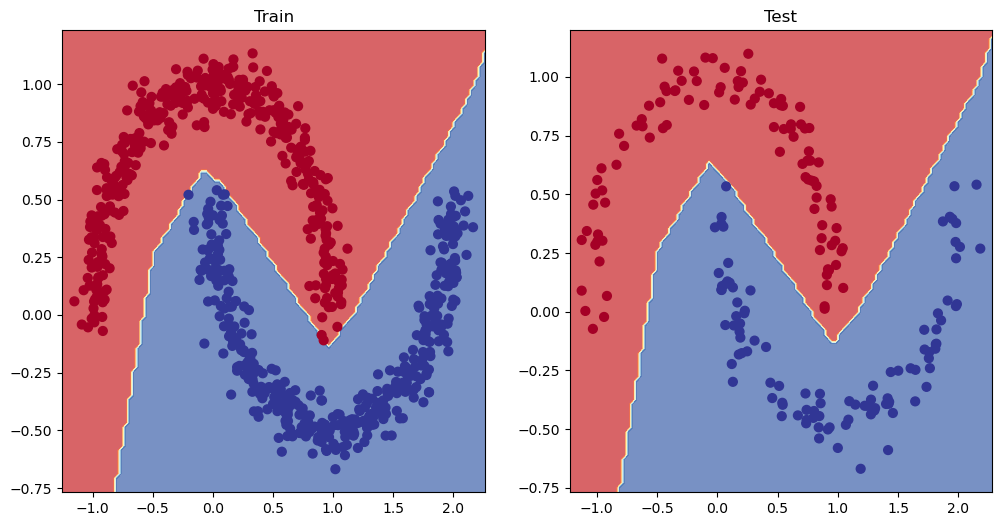

In [16]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)